In [56]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import scipy
#from pyensembl import EnsemblRelease

In [86]:
adata = sc.read_h5ad('/home/yike/phd/cancer_cells_img_seq/data/20220201_NextSeq/filter.h5ad')
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata, base=2)
sc.pp.filter_genes(adata, min_cells=3)

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [87]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=2000)

In [88]:
sc.pp.pca(adata, n_comps=40, use_highly_variable=True, svd_solver='arpack')

/home/yike/.conda/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [89]:
df_loadings = pd.DataFrame(adata.varm['PCs'], index=adata.var_names)
# get rank of each loading for each PC
df_rankings = pd.DataFrame((-1 * df_loadings.values).argsort(0).argsort(0), 
                           index=df_loadings.index, 
                           columns=df_loadings.columns)

In [90]:
print("Top loadings for PC1...")
print(df_loadings[0].sort_values().tail())

Top loadings for PC1...
gene_name
KRT19     0.055488
COX6C     0.056197
TMSB4X    0.056903
KRT18     0.056927
RPS19     0.056997
Name: 0, dtype: float64


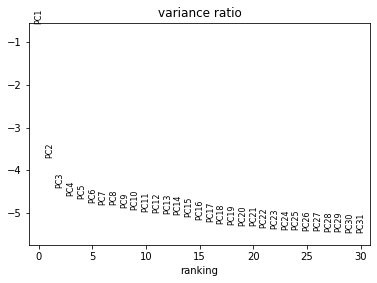

In [91]:
sc.pl.pca_variance_ratio(adata, log=True)

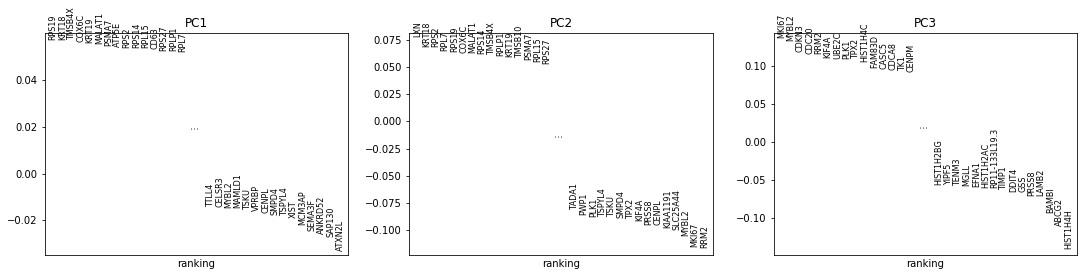

In [92]:
sc.pl.pca_loadings(adata)

In [105]:
adata.obsm['X_pca'][: 3]

## 10

array([[ 1.30886124e+02,  4.45802498e+00, -1.84685936e+01,
        -5.45342541e+00,  2.35736108e+00, -2.17263222e+00,
        -1.11132503e+00,  8.71296346e-01, -7.33016968e-01,
         1.58732414e-01,  4.10692501e+00, -9.91333604e-01,
         4.50605917e+00, -7.85711479e+00,  4.17118931e+00,
        -8.90952015e+00,  7.33979940e+00,  6.47421241e-01,
         8.64730835e+00, -2.27980518e+00, -5.16448736e+00,
         3.29379249e+00,  3.21426487e+00,  2.65692472e+00,
         1.62152367e+01,  5.94940853e+00,  4.15637732e+00,
         1.03555059e+00,  3.33040476e+00,  6.41111708e+00,
        -7.73632812e+00, -1.60571146e+00,  6.10685587e-01,
        -5.10022116e+00,  8.53757501e-01,  9.75645840e-01,
        -1.31472182e+00,  2.43471980e+00, -6.06831551e+00,
         3.81983066e+00],
       [ 1.30851379e+02, -1.89553909e+01, -9.64694405e+00,
        -2.28826970e-01, -5.40135384e+00,  5.94792032e+00,
         1.41703635e-01,  5.08058250e-01,  1.51282704e+00,
         5.63357258e+00,  3.08

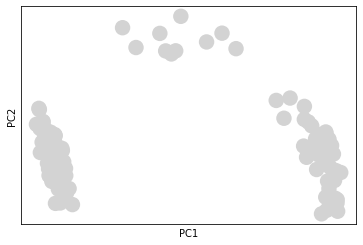

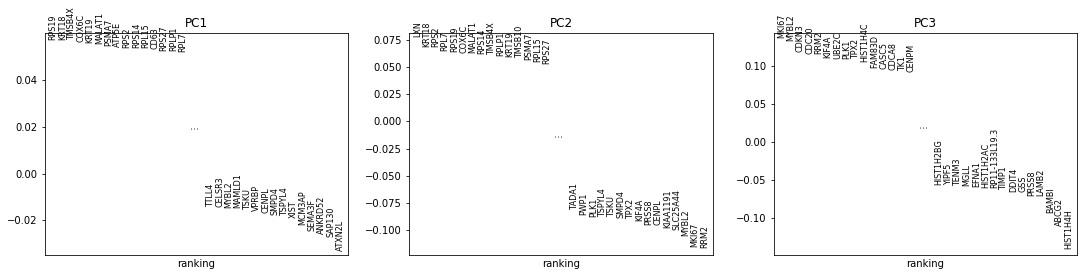

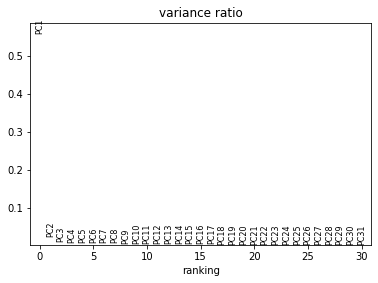

In [100]:
sc.pl.pca_overview(adata)

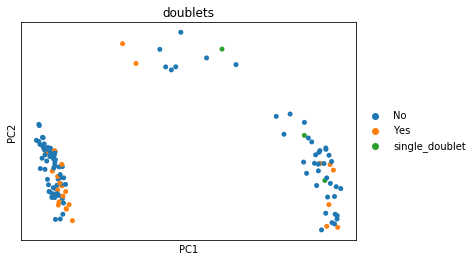

In [93]:
sc.pl.pca(adata, color='doublets', s=100, components=['1, 2'])

In [34]:
df_rankings

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
gene_name,,,,,,,,,,,,,,,,,,,,,
TSPAN6,1003,15740,255,75,330,434,85,15294,15691,398,...,98,15933,11,15937,15903,369,52,336,969,15716
DPM1,518,15287,15593,15746,273,15825,15819,274,351,15838,...,15787,15453,280,580,15340,15583,298,332,912,139
SCYL3,10681,12513,10537,10454,10422,10497,10450,10534,10509,10568,...,10494,10469,10490,10526,10489,10512,10493,10520,10508,10499
C1orf112,10682,12509,10538,10455,10423,10498,10451,10535,10510,10569,...,10495,10470,10491,10527,10490,10513,10494,10521,10509,10500
FUCA2,10683,12508,10539,10456,10424,10499,10452,10536,10511,10570,...,10496,10471,10492,10528,10491,10514,10495,10522,10510,10501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTA-941F9.10,5717,5385,5568,5484,3030,5528,5481,5565,5540,3313,...,5526,5501,5521,5556,5518,5544,5524,3261,5538,5530
RP11-80P20.3,5718,5386,5569,5485,3053,5529,5482,5566,5541,3304,...,5527,5502,5522,5557,5519,5545,5525,3244,5539,5531
RP13-516M14.8,5719,5387,5570,5486,3051,5530,5483,5567,5542,3336,...,5528,5503,5523,5558,5520,5546,5526,3243,5540,5532
